In [1]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import koreanize_matplotlib

In [4]:
#CSV 파일 불러오기
df_stocks = pd.read_csv('stocks.csv')

In [5]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

In [6]:
stocks_columns = {'Code':'종목코드', 'Name':'종목명', 'Market':'시장', 'Dept':'부서(한국거래소)', 'Close':'종가', 'ChangeCode':'등락기호','Changes':'전일대비', 
                     'ChagesRatio':'전일대비 등락률', 'Open':'시가','High':'고가', 'Low':'저가', 'Volume':'거래량', 'Amount':'거래대금', 'Marcap':'시가총액', 
                     'Stocks':'주식발행수', 'MarketId':'시장기호', 'Sector':'업종', 'Industry':'주요제품', 'ListingDate':'상장일', 
                     'SettleMonth':'결산월', 'Representative':'대표자명','HomePage':'홈페이지', 'Region':'지역'} 

In [7]:
df_stocks.rename(columns = stocks_columns, inplace = True)

In [8]:
df_stocks.head(1)

,종목코드,종목명,시장,부서(한국거래소),종가,등락기호,전일대비,전일대비 등락률,시가,고가,저가,거래량,거래대금,시가총액,주식발행수,시장기호,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,005930,삼성전자,KOSPI,NaN,53900,1,500,0.94,54500,54500,53700,6965539,377240465300,321771279445000,5969782550,STK,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,한종희,http://www.samsung.com/sec,경기도


### 문제

1. 서울 특별시 소재지를 두고 있는 KOSPI 종목의 종목명과 산업명 가져오기

In [ ]:
# 행 추출방법

# case1) loc : 인덱스명
# df_stocks.loc[df_stocks['ChagesRatio'] == 30]
# df_stocks.loc[df_stocks['ChagesRatio'] == 30[['Name','Sector']]
# df_stocks.loc[df_stocks['ChagesRatio'] == 30, ['Name','Sector']]

# case2) iloc : 인덱스번호
# indices = df_stocks.index[df_stocks['ChagesRatio'] == 30]
# df_stocks.iloc[indices]
# df_stocks.iloc[df_stocks.index[df_stocks['ChagesRatio'] == 30]][['Name','Sector']]
# df_stocks.iloc[df_stocks.index[df_stocks['ChagesRatio'] == 30], [1,16]]

# case3) query
# df_stocks.query('ChagesRatio == 30')[['Name','Sector']]

# case4) [] : 대괄호 접근
# df_stocks[df_stocks['ChagesRatio'] == 30][['Name', 'Sector']]

In [27]:
# 컬럼(column) = 변수(variable) = 피처(feature)
# 변수에서 중복되지 않은 값 가져오기
df_stocks['지역'].unique()

array(['경기도', '서울특별시', '인천광역시', nan, '경상북도', '제주특별자치도', '울산광역시', '대전광역시',
       '전라남도', '경상남도', '충청북도', '세종특별자치시', '부산광역시', '충청남도', '강원특별자치도',
       '대구광역시', '전북특별자치도', '미국', '광주광역시', '싱가포르', '케이맨 제도', '홍콩', '일본'],
      dtype=object)

In [28]:
df_stocks['시장'].unique()

array(['KOSPI', 'KOSDAQ GLOBAL', 'KOSDAQ', 'KONEX'], dtype=object)

In [ ]:
# 서울 특별시 소재지를 두고있는 종목

# loc
# seoul_df_stocks = df_stocks.loc[df_stocks['지역'] == '서울특별시']
# seoul_df_stocks

# query
# seoul_df_stocks = df_stocks.query('지역 == "서울특별시"')
# seoul_df_stocks

# 대괄호 접근
seoul_df_stocks = df_stocks[df_stocks['지역'] == '서울특별시']
seoul_df_stocks

In [39]:
# 서울 특별시 소재지를 두고있는 KOSPI 종목
kospi_df_stocks = seoul_df_stocks[seoul_df_stocks['시장'] == 'KOSPI']

# 의 종목명과 업종
kospi_df_stocks[['종목명','업종']]

,종목명,업종
2,LG에너지솔루션,일차전지 및 이차전지 제조업
4,현대차,자동차용 엔진 및 자동차 제조업
7,기아,자동차용 엔진 및 자동차 제조업
8,KB금융,기타 금융업
10,고려아연,1차 비철금속 제조업
...,...,...
2566,주연테크,컴퓨터 및 주변장치 제조업
2594,제이준코스메틱,기타 화학제품 제조업
2602,한국ANKOR유전,신탁업 및 집합투자업
2657,에이리츠,부동산 임대 및 공급업


2. 2024년에 상장한 종목의 종목명,업종,시가총액,주식,주식발행수 가져오기

In [ ]:
# case1) '-'를 구분자로 하여 년도만 추출

day = '2024-12-09'
day.split('-')[0]     # ['2024','12','09']

# 없는 열을 추가하면 파생열을 새로 생성
df_stocks['상장년도'] = df_stocks['상장일'].str.split('-').str[0]
df_stocks.head(2)

In [ ]:
dir(df_stocks['상장일'].dt)

In [12]:
# case2) 문자열로 표현된 날짜를 날짜 타입으로 변경후 년도만 추출
# 문자열을 날짜형식으로 변환
df_stocks['상장일'] = pd.to_datetime(df_stocks['상장일'])
# df_stocks.info()
# df_stocks['상장일'].dtype
df_stocks['상장일'].dt.year
df_stocks['상장년도2'] = df_stocks['상장일'].dt.year
# df_stocks['상장일'].dt.month
# df_stocks['상장일'].dt.day


In [14]:
df_stocks.head(1)

,종목코드,종목명,시장,부서(한국거래소),종가,등락기호,전일대비,전일대비 등락률,시가,고가,저가,거래량,거래대금,시가총액,주식발행수,시장기호,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역,상장년도,상장년도2
0,005930,삼성전자,KOSPI,NaN,53900,1,500,0.94,54500,54500,53700,6965539,377240465300,321771279445000,5969782550,STK,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,한종희,http://www.samsung.com/sec,경기도,1975,1975.0


In [15]:
len(df_stocks[df_stocks['상장년도'] == '2024'][['종목명','업종','시가총액','주식발행수']])
df_stocks[df_stocks['상장년도'] == '2024'][['종목명','업종','시가총액','주식발행수']].head(2)

,종목명,업종,시가총액,주식발행수
61,HD현대마린솔루션,"건축기술, 엔지니어링 및 관련 기술 서비스업",5716270000000,44450000
99,엘앤에프,일차전지 및 이차전지 제조업,3502596617000,36296338


In [16]:
len(df_stocks[df_stocks['상장년도2'] == 2024][['종목명','업종','시가총액','주식발행수']])
df_stocks[df_stocks['상장년도2'] == 2024][['종목명','업종','시가총액','주식발행수']].head(2)

,종목명,업종,시가총액,주식발행수
61,HD현대마린솔루션,"건축기술, 엔지니어링 및 관련 기술 서비스업",5716270000000,44450000
99,엘앤에프,일차전지 및 이차전지 제조업,3502596617000,36296338


In [ ]:
# 문자열로 표시된 날짜
# date_str = "1975-06-11"

# 년도 추출
# year = date_str[:4]

In [48]:
# '상장일'을 날짜 형식으로 변환 (원본을 수정함)
df_stocks['상장일'] = pd.to_datetime(df_stocks['상장일'], format='%Y-%m-%d')

0      1975-06-11
1      1996-12-26
2      2022-01-27
3      2016-11-10
4      1974-06-28
          ...    
2850   2016-06-24
2851   2018-11-23
2852   2018-12-21
2853   2022-09-27
2854   2023-07-05
Name: 상장일, Length: 2855, dtype: datetime64[ns]

In [ ]:
# 2024년에 상장한 종목
df_stocks_2024 = df_stocks[df_stocks['상장일'].dt.year == 2024]
df_stocks_2024

In [50]:

# 2024년에 상장한 종목의 종목명,업종,시가총액,주식발행수
df_stocks_2024[['종목명','업종','시가총액','주식발행수']]

,종목명,업종,시가총액,주식발행수
61,HD현대마린솔루션,"건축기술, 엔지니어링 및 관련 기술 서비스업",5574030000000,44450000
99,엘앤에프,일차전지 및 이차전지 제조업,3524374419800,36296338
106,시프트업,소프트웨어 개발 및 공급업,3173408768000,58334720
108,포스코DX,"건축기술, 엔지니어링 및 관련 기술 서비스업",3071101525800,152034729
142,에이피알,기타 화학제품 제조업,1940607801000,38125890
...,...,...,...,...
2784,하나33호스팩,금융 지원 서비스업,7585000000,3700000
2785,신한제13호스팩,금융 지원 서비스업,7511500000,3620000
2794,에스케이증권제12호스팩,금융 지원 서비스업,6785500000,3310000
2797,하나32호스팩,금융 지원 서비스업,6688000000,3200000


In [ ]:
df_stocks_2024.sort_values('주식발행수', ascending=False)[['종목명','주식발행수']].head(20).plot(kind='barh')

3. KOSPI 시장의 가장 높은 거래량 세곳과, 가장 낮은 거래량 세곳의 종목명, 업종, 거래량. (0인 종목 제외)

In [ ]:
# KOSPI 시장이면서, 거래량이 0이 아닌곳
df_stocks[(df_stocks['시장'] == 'KOSPI') & (df_stocks['거래량'] != 0)]

In [87]:
df_stocks[(df_stocks['시장'] == 'KOSPI') & (df_stocks['거래량'] != 0)].sort_values('거래량', ascending=False).head(3)[['종목명','업종','거래량']]

,종목명,업종,거래량
1472,써니전자,전자부품 제조업,29929886
1642,형지엘리트,봉제의복 제조업,22028707
848,삼부토건,토목 건설업,14973966


In [88]:
df_stocks[(df_stocks['시장'] == 'KOSPI') & (df_stocks['거래량'] != 0)].sort_values('거래량', ascending=False).tail(3)[['종목명','업종','거래량']]

,종목명,업종,거래량
2811,하이트진로홀딩스우,NaN,1
2675,JW중외제약2우B,NaN,1
2843,동양우,NaN,1


4. 상장년도별 종목 빈도수

In [18]:
# case1)

# to.frame : series => dataframe
# value_counts(하나의 컬럼)
df_stocks['상장년도'].value_counts().to_frame().reset_index()

# df_stocks['상장년도'].value_counts().to_frame().set_index('상장년도')


,상장년도,count
0,2023,160
1,2024,131
2,2022,124
3,2015,121
4,2018,112
...,...,...
55,1964,1
56,1966,1
57,1971,1
58,1980,1


In [19]:
# case 2)
df_stocks.groupby('상장년도').size()
# df_stocks.groupby('상장년도').agg('size')

상장년도
1956      4
1962      1
1964      1
1966      1
1968      6
       ... 
2020     92
2021    111
2022    124
2023    160
2024    131
Length: 60, dtype: int64

In [181]:
# 1956년에 상장한 종목
df_stocks[df_stocks['상장년도']== '1956']['종목명']

152       CJ대한통운
886           경방
1050       유수홀딩스
1268    한진중공업홀딩스
Name: 종목명, dtype: object

In [184]:
# 오름차순 정렬 (values)
df_stocks.groupby(['상장년도','시장']).agg('size').sort_values(ascending=False)

상장년도  시장           
2023  KOSDAQ           127
2024  KOSDAQ           114
2022  KOSDAQ            99
2018  KOSDAQ            83
2019  KOSDAQ            82
                      ... 
1997  KOSDAQ GLOBAL      1
2012  KOSDAQ GLOBAL      1
2006  KOSDAQ GLOBAL      1
1983  KOSPI              1
1962  KOSPI              1
Length: 127, dtype: int64

In [186]:
# 올해의
df_stocks.query('상장년도 == "2024"').groupby(['상장년도','시장']).agg('size').sort_values(ascending=False)

상장년도  시장    
2024  KOSDAQ    114
      KOSPI      14
      KONEX       3
dtype: int64

#### 빈도수
1. 컬럼 1개의 빈도수 : df['컬럼명'].value_counts()
2. 컬럼 2개의 빈도수 : pd.crosstab(df['컬럼명1'],df['컬럼명2'])

In [187]:
df_stocks['시장'].value_counts()

시장
KOSDAQ           1728
KOSPI             959
KONEX             120
KOSDAQ GLOBAL      48
Name: count, dtype: int64

In [20]:
# 각 시장별 상장년도
pd.crosstab(df_stocks['시장'],df_stocks['상장년도'])

상장년도,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
시장,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,7,19,14,9,10,11,6,5,14,14,3
KOSDAQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,4,10,16,34,14,19,36,1,36,76,77,75,34,35,45,36,51,28,45,55,46,16,30,55,78,56,57,83,82,70,78,99,127,114
KOSDAQ GLOBAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,3,2,4,0,0,1,2,0,0,0,1,1,2,2,7,3,6,0,3,2,2,2,0,0
KOSPI,4,1,1,1,6,5,4,1,3,21,10,30,51,16,10,3,1,1,1,5,8,8,21,50,51,21,11,2,4,16,14,31,16,3,15,4,12,19,15,13,16,20,16,17,18,26,25,10,10,9,17,18,19,19,15,14,26,9,19,14


In [22]:
pd.crosstab(df_stocks['시장'],df_stocks['지역'])

지역,강원특별자치도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,세종특별자치시,싱가포르,울산광역시,인천광역시,일본,전라남도,전북특별자치도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
시장,,,,,,,,,,,,,,,,,,,,,,
KONEX,5,38,2,3,3,3,5,0,1,37,1,0,0,4,0,3,4,0,4,7,0,0
KOSDAQ,18,563,50,44,10,32,47,6,43,639,8,0,12,67,2,13,19,2,75,63,4,8
KOSDAQ GLOBAL,2,19,0,3,0,0,2,0,1,10,1,0,0,0,0,0,1,0,3,6,0,0
KOSPI,4,166,43,23,8,22,8,0,37,422,3,1,17,23,0,8,12,5,26,17,1,0


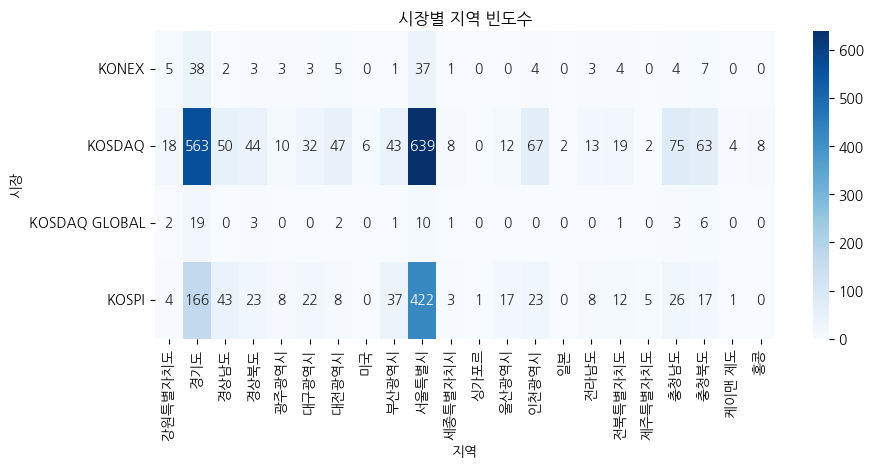

In [207]:
# 각 시장별 지역
crosstab = pd.crosstab(df_stocks['시장'],df_stocks['지역'])
# annot : 수치를 보여줌, fmt='d' : 정수로 
plt.figure(figsize=(10,4))
# heatmap
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('시장별 지역 빈도수')
plt.xlabel('지역')
plt.ylabel('시장')
plt.show()

In [200]:
# df_stocks[(df_stocks['시장'] == 'KOSDAQ') & ((df_stocks['지역'] == '홍콩') | (df_stocks['지역'] == '일본'))]['종목명']

cond1 = (df_stocks['지역'] == '홍콩') | (df_stocks['지역'] == '일본')
cond2 = (df_stocks['시장'] == 'KOSDAQ')

df_stocks[cond1 & cond2][['지역','종목명','홈페이지']].sort_values('지역')


,지역,종목명,홈페이지
766,일본,JTC,http://www.groupjtc.com/korean/
1133,일본,SBI핀테크솔루션즈,http://https://www.sbi-finsol.co.jp/kr/
687,홍콩,GRT,NaN
1154,홍콩,고스트스튜디오,http://www.ghoststudio.net
1333,홍콩,윙입푸드,http://wingyip-food.com
2024,홍콩,헝셩그룹,http://www.hengsheng.co.kr/
2242,홍콩,컬러레이,http://www.coloray.co.kr
2428,홍콩,오가닉티코스메틱,NaN
2429,홍콩,이스트아시아홀딩스,http://www.qiuzhi.com
2554,홍콩,로스웰,NaN
